### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
#!conda install -y -c anaconda spacy 

In [2]:
#!python -m spacy download es_core_news_sm

In [3]:
#!python -m spacy download es_core_news_md

In [4]:
#!conda install -y -c conda-forge wordcloud

In [5]:
#!conda install -y -c conda-forge textacy

In [6]:
#!conda install -y  -c anaconda nltk 

In [7]:
import spacy
import os
from spacy.lang.es.examples import sentences
import pandas as pd 
import shutil
#from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy
import re
import nltk
#from nltk.util import ngrams
import numpy as np

import lib.nlp_cba as nlp_cba
import lib.graph_cba as graph_cba

# Generar un corpus con todos los documentos

In [8]:
root_path = "Documentos"

directories = [x[0] for x in os.walk(root_path)]

directories.pop(0)

for directory in directories:
    print (directory)


Documentos/MENORES
Documentos/PENAL
Documentos/FAMILIA
Documentos/LABORAL


In [9]:
characters_to_replace = [',', ':' , "\n" , "”"]
new_character = " "

mapMultipleCharsToChar = nlp_cba.MapMultipleCharsToCharProcessor(characters_to_replace , new_character , True)
textCleaner = nlp_cba.TextCleaner()
textCleaner.registerProcessor(mapMultipleCharsToChar)


corpus_df = nlp_cba.generate_corpus_df(directories , textCleaner)
corpus_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,unívoco 18900 fecha 04/04/2016 materia niñe...,Documentos/MENORES
2,13/03/2013 juzgado de la niñez juventud y vio...,Documentos/MENORES
3,los autos caratulados a. a. - denuncia...,Documentos/MENORES
4,juzg. de niñez adolescencia y violencia famil...,Documentos/MENORES
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [10]:
corpus_df.to_csv("corpus.csv" ,index= False)

In [11]:
corpus_df = pd.read_csv("corpus.csv")
corpus_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,unívoco 18900 fecha 04/04/2016 materia niñe...,Documentos/MENORES
2,13/03/2013 juzgado de la niñez juventud y vio...,Documentos/MENORES
3,los autos caratulados a. a. - denuncia...,Documentos/MENORES
4,juzg. de niñez adolescencia y violencia famil...,Documentos/MENORES
...,...,...
238,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
239,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
240,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL
241,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [12]:
def create_df_text_aggregated_by_jurisdiction (directories , corpus_df):

    aggregated_corpus =  []
    for directory in directories:
    
        text = corpus_df[corpus_df['classifier'] == directory ]['text'].tolist()
        text = " ".join(text)
        aggregated_corpus.append([text , directory])
        
    return pd.DataFrame(aggregated_corpus, columns=["text", "classifier"] )


In [13]:
aggregated_corups_df = create_df_text_aggregated_by_jurisdiction(directories, corpus_df)

In [14]:
aggregated_corups_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


In [15]:
aggregated_corups_df.to_csv("aggregated_corpus.csv" ,index= False)

In [16]:
aggregated_corups_df = pd.read_csv("aggregated_corpus.csv")
aggregated_corups_df

,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [17]:
(df_common_words_menores,common_words_menores ) = nlp_cba.get_word_ocurrence_df(aggregated_corups_df, 'Documentos/MENORES')
(df_common_words_penal, common_words_penal)  = nlp_cba.get_word_ocurrence_df(aggregated_corups_df, 'Documentos/FAMILIA')
(df_common_words_familia, common_words_familia)= nlp_cba.get_word_ocurrence_df(aggregated_corups_df, 'Documentos/LABORAL')
(df_common_words_laboral, common_words_laboral) = nlp_cba.get_word_ocurrence_df(aggregated_corups_df,'Documentos/PENAL')

In [36]:
merged = pd.merge(df_common_words_menores,df_common_words_penal, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_familia, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_laboral, on='word' , how='outer')

colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count', 'laboral_word_count']
merged.columns = colums_names

merged.replace(np.nan, 0 , inplace=True)

merged['total_word_count'] = merged['menores_word_count'] + merged['penal_word_count'] + merged['famila_word_count'] + merged['laboral_word_count']
df_common_word_total = merged

In [37]:
df_common_words_menores.shape

(15053, 2)

In [38]:
df_common_words_penal.shape

(26564, 2)

In [39]:
df_common_words_familia.shape

(7475, 2)

In [40]:
df_common_words_laboral.shape

(29961, 2)

In [44]:
df_common_word_total.shape

(52926, 6)

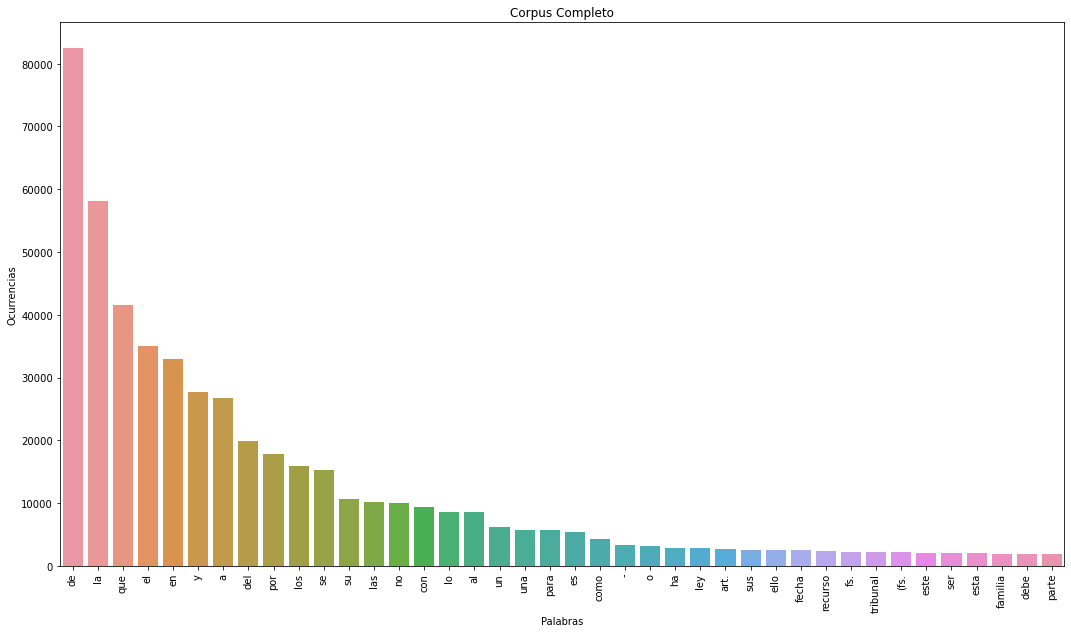

In [48]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot  )

### Histograma de frecuencias de palabaras por Corpus completo y por Fuero

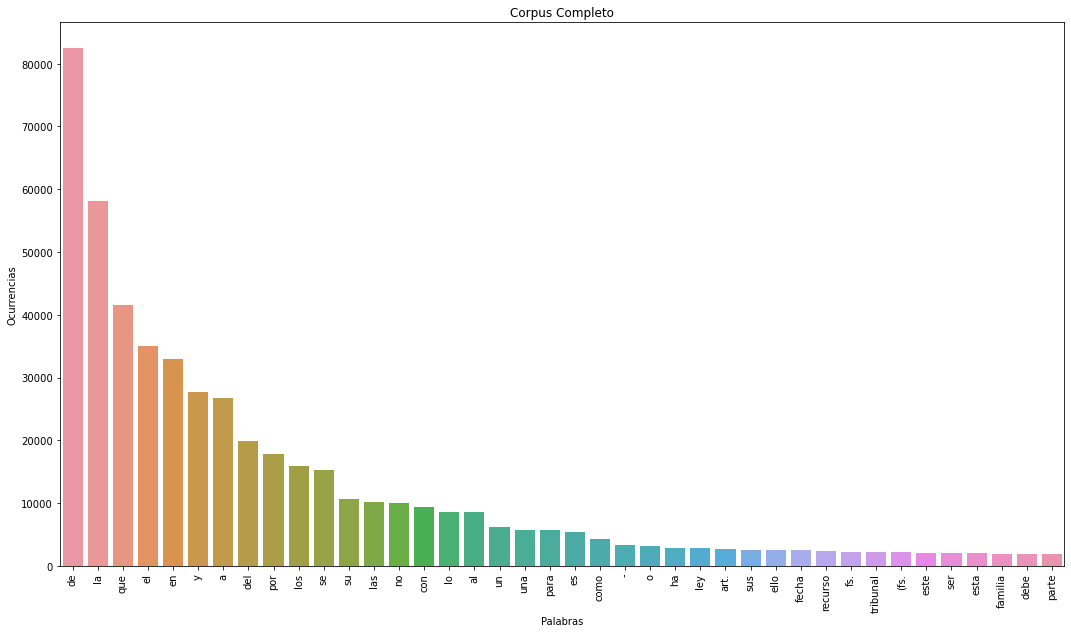

In [42]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot  )

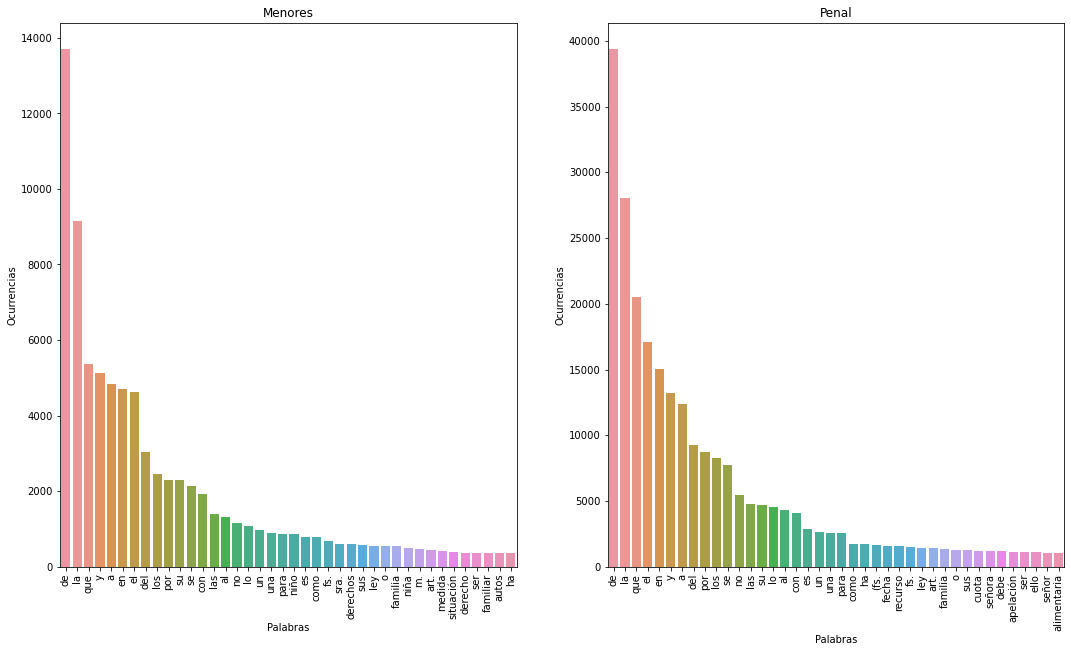

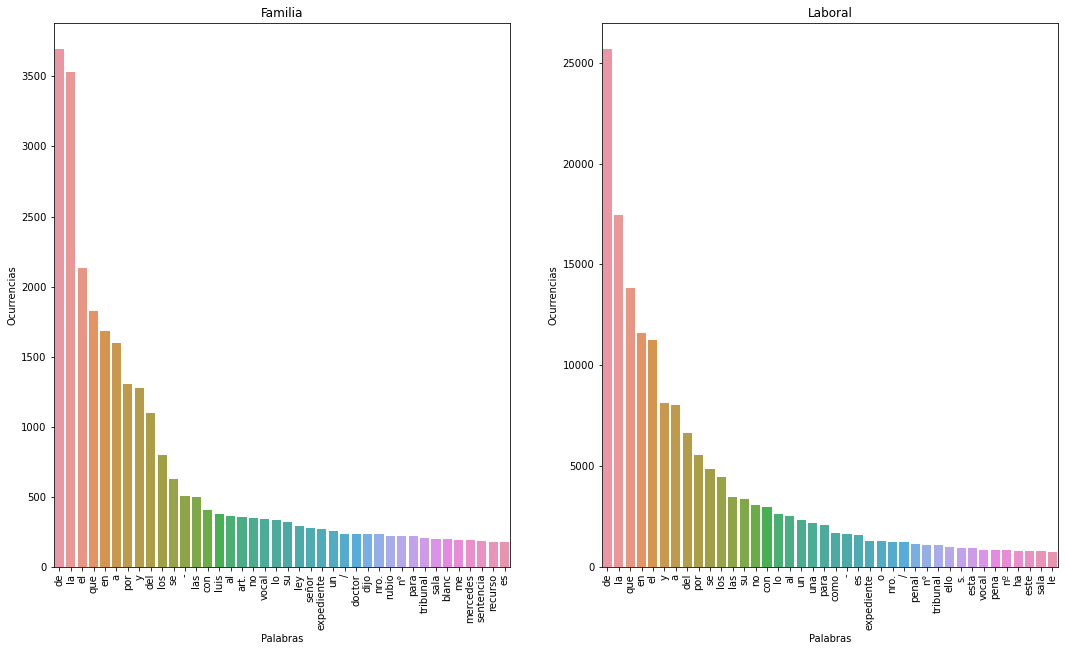

In [43]:


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_menores ,title ="Menores" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_penal ,title ="Penal" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_familia ,title ="Familia" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_laboral ,title ="Laboral" , limit_to_plot = limit_to_plot )

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

# Hacer lo mismo con n-gramas.

### Distribucion de frecuencias n-gramas (bi-gramas en este caso)

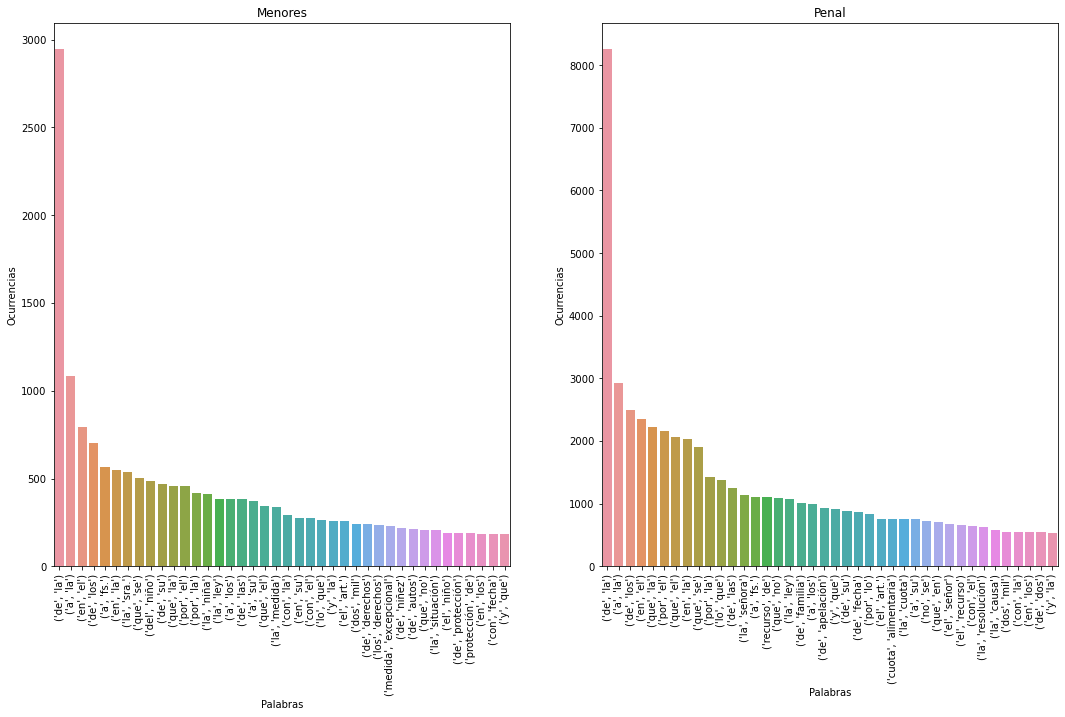

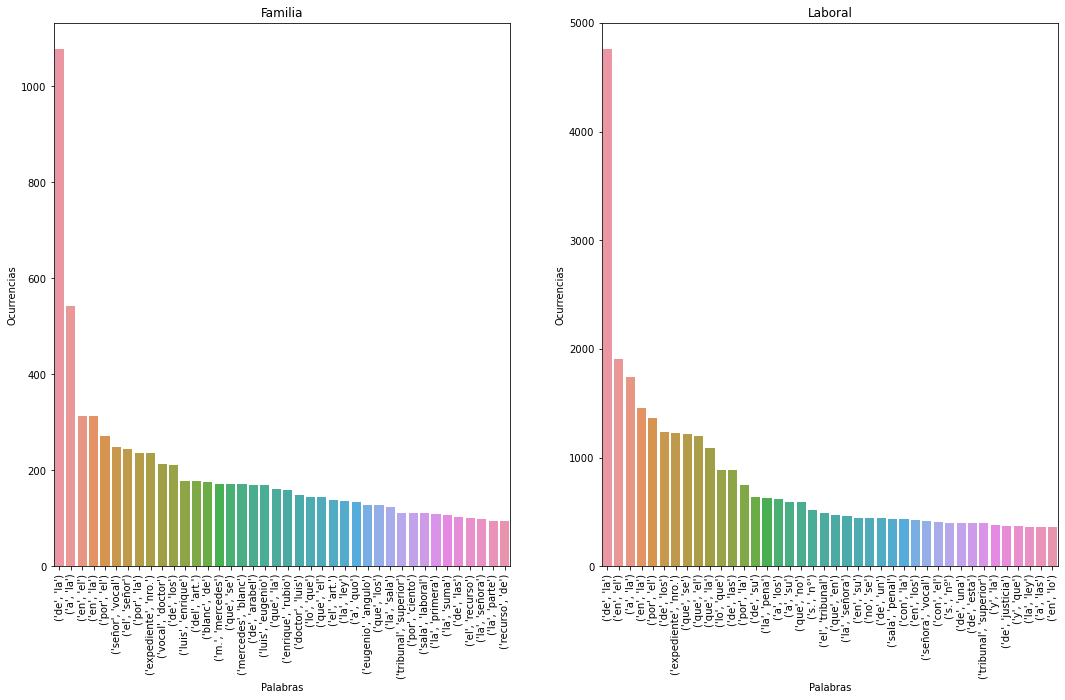

In [25]:
n_gram_count = 2

df_menores_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_menores,n_gram_count )
df_penal_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_penal,n_gram_count )
df_familia_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_familia,n_gram_count )
df_laboral_anagrams_count = nlp_cba.get_anagrams_count_df(common_words_laboral,n_gram_count )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_menores_anagrams_count ,title ="Menores" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_penal_anagrams_count ,title ="Penal" , limit_to_plot = limit_to_plot )

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_familia_anagrams_count ,title ="Familia" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_laboral_anagrams_count ,title ="Laboral" , limit_to_plot = limit_to_plot )


### Visualizar la frecuencia de bi anagramas en una nube de palabras

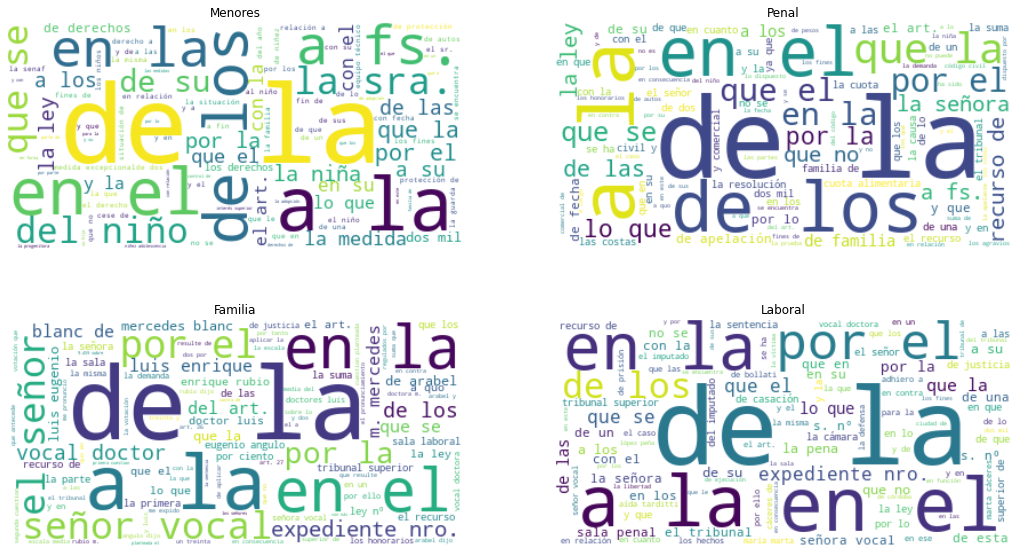

In [26]:
limit_words = 100


df_menores_anagrams_count_tmp = nlp_cba.get_df_word_cloud(df = df_menores_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_penal_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_familia_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_anagrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_laboral_anagrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_menores_anagrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[0][1], df_penal_anagrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][0], df_familia_anagrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][1], df_laboral_anagrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

# Visualizar la frecuencia de palabras en una nube de palabras.

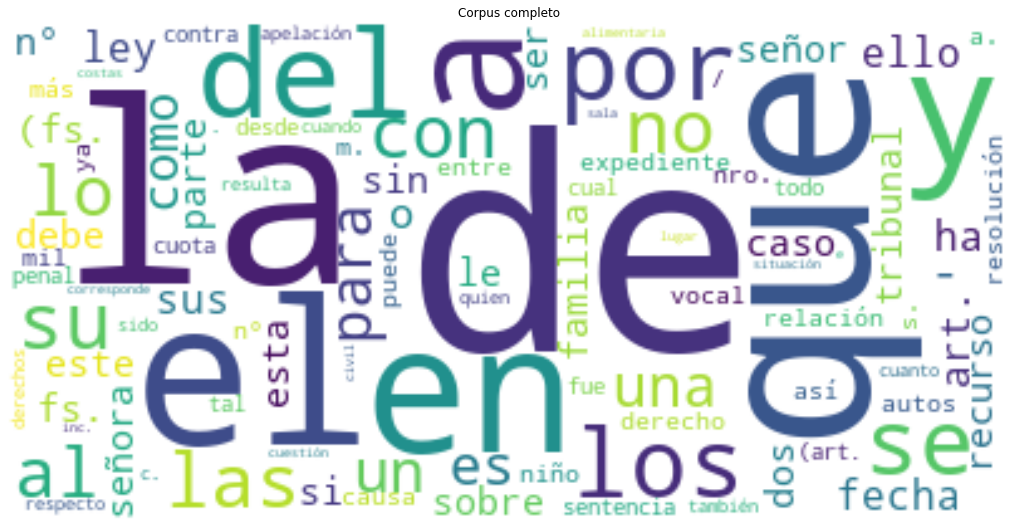

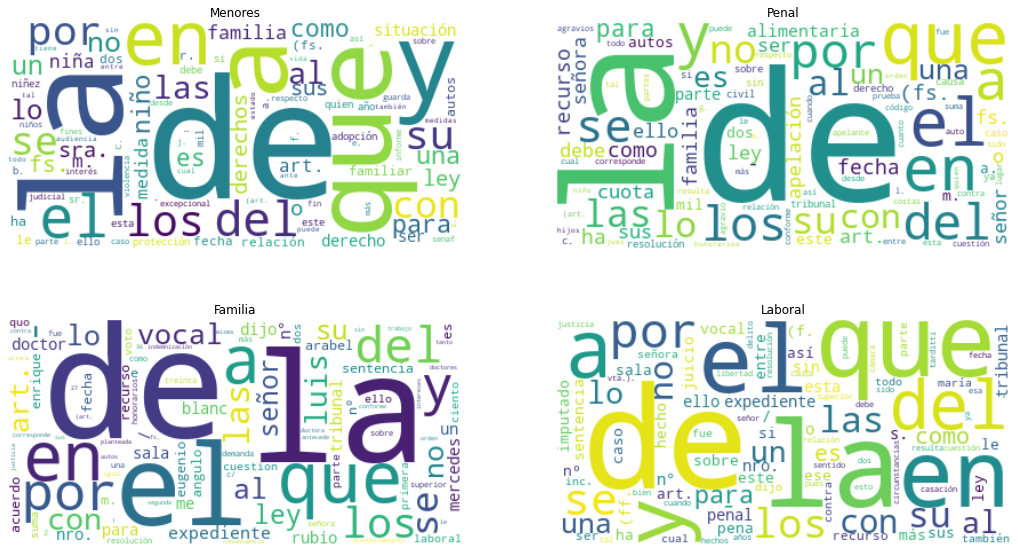

In [28]:
limit_words = 100

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes, df_common_word_total , limit_words, "Corpus completo" , columns = ["word","total_word_count"])

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_common_words_menores , limit_words, "Menores" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[0][1], df_common_words_penal , limit_words, "Penal" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][0], df_common_words_familia , limit_words, "Familia" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][1], df_common_words_laboral , limit_words, "Laboral" , columns = ["word","count"])